Importing the yahoo finance library, which is essential to get the S&P global finance data.

In [1]:
import yfinance as yf

Initializing the ticker class and then we will use GSPC which S&P 500 index.

In [2]:
sp500=yf.Ticker('^GSPC')

With the help of the 'history' method, we will use 'period' parameter to get the all the data of S&P 500 from the time it was created till the current year.

In [3]:
sp500=sp500.history(period='max')

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,3195650000,0.0,0.0
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,0.0,0.0
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,0.0,0.0


<Axes: xlabel='Date'>

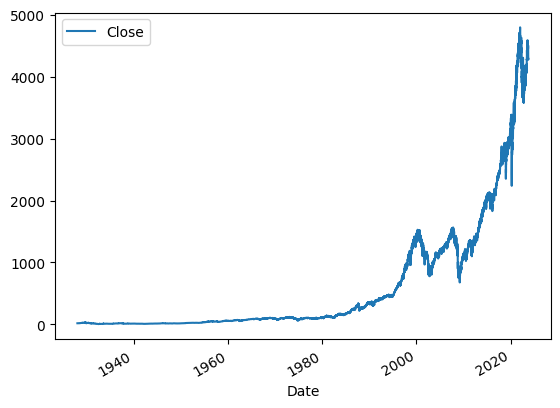

In [5]:
sp500.plot.line(y='Close',use_index=True)

Since the Dividends and Stock splits columns are of no use in our analysis so, we are deleting these two columns.

In [6]:
del sp500['Dividends']
del sp500['Stock Splits']

In [7]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,3195650000
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000


Our ultimate goal is to predict if the stock price goes up or down.

Now we will create a new column named 'Tomorrow' using the 'shift(-1)' function, this will give the closing price of the tomorrow for the corresponding row.

In [8]:
sp500['Tomorrow']=sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,3195650000,4273.529785
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4274.509766
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4299.700195


Now we will create our target column which will have the boolean value of 1 when the tomorrow price is greater than the closing price of the day, i.e., the increase in the stock price.

In [9]:
sp500['Target']=(sp500['Tomorrow']>sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,3195650000,4273.529785,0
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4274.509766,1
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4299.700195,1


We will use the data from the year 1990, because in the stock market prediction if we use the data which is historically too far then it might cause the problem since the market might have shifted.

In [10]:
sp500=sp500.loc['1990-01-01' :].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,3195650000,4273.529785,0
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4274.509766,1
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4299.700195,1


Our predictors columns are 'Open','High','Low','Close','Volume'.
1. Now we will use the Random Forest Classifer since there is non linear relation between predictors and our target.
2. we will use the n_estimator= 100 to set the number od decision tree as 100, we will use the min_sample_split=100 to decrease the overfitting, since the decsion tree are highly prone to overfitting.
3. In train set we will use all of the row except the last 100 rows & in the test set we will use the last 100 rows.

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]
predictors=['Open','High','Low','Close','Volume']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

Now using the sklearn's precision_score we will find the accuracy of the model.

In [12]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])


In [13]:
import pandas as pd
preds=pd.Series(preds, index=test.index)
preds

Date
2023-05-09 00:00:00-04:00    1
2023-05-10 00:00:00-04:00    0
2023-05-11 00:00:00-04:00    1
2023-05-12 00:00:00-04:00    1
2023-05-15 00:00:00-04:00    1
                            ..
2023-09-25 00:00:00-04:00    0
2023-09-26 00:00:00-04:00    1
2023-09-27 00:00:00-04:00    1
2023-09-28 00:00:00-04:00    1
2023-09-29 00:00:00-04:00    0
Length: 100, dtype: int64

In [14]:
precision_score(test['Target'],preds)

0.5373134328358209

In [15]:
combined=pd.concat([test['Target'],preds],axis=1)
combined

,Target,0
Date,,
2023-05-09 00:00:00-04:00,1,1
2023-05-10 00:00:00-04:00,0,0
2023-05-11 00:00:00-04:00,0,1
2023-05-12 00:00:00-04:00,1,1
2023-05-15 00:00:00-04:00,0,1
...,...,...
2023-09-25 00:00:00-04:00,0,0
2023-09-26 00:00:00-04:00,1,1
2023-09-27 00:00:00-04:00,1,1


As we can see the accuracy of the model is just 53% so, our next task is to improve or model.
Now with the help of backtesting we are going to improve our model.
Now we will create the predict function which will give the output as of the combined concated test set's target and predicted value in the data frame format.

In [16]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name='prediction')
    combined=pd.concat([test['Target'],preds],axis=1)
    return combined

In a trading year there are 250 days. We will create the backtest fucntion and this back test function will put the starting 10 years data in test set(as we set start=2500,which is 250 * 10) and it will predict the data for the next year i.e., 11th year, as in the test data inside the 'iloc' fucntion we put [i:i+step]. And this prediction will be run inside the loop and each prediction will be appended in the array and later on will be stored in the data frame.

In [17]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:i+step].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
        return pd.concat(all_predictions)

In [18]:
predictions=backtest(sp500,model,predictors)
predictions

,Target,prediction
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2000-11-09 00:00:00-05:00,0,0
2000-11-10 00:00:00-05:00,0,1
2000-11-13 00:00:00-05:00,1,0


In [19]:
precision_score(predictions['Target'],predictions['prediction'])

0.5

### Now we will add additional predictors to our model. 


So, first we will set the horizon as a list of 2,5,60,250,1000 these numbers indicates the number of trading days.
1. Intitally we will set a empty list with the name of new_predictors. 
2. Inside the for loop, we will create a data frame as rolling_averages which is rolling average of the sp500 data frame where we set parameter as 'horizon' in rolling(horizon),for e.g. in case of horizon=2, this will create data frame which has the rolling average between current row's and previous row's element. Then later on we will find ratio column which is the ratio of the 'Close' column of sp500 data frame and 'close' column of rolling_averages data frame.
3. Later on we will create the trend_column which is the sum of 1s i.e., increase in the stock price, and we used shift(1) fucntion so that sum will be of all of the 1s before the current row in the target column.
4. Finally all of these new columns are stored in the new_predictors using empty array.

In [20]:
horizons=[2,5,60,250,1000]
new_predictors=[]
for horizon in horizons:
    rolling_averages=sp500.rolling(horizon).mean()
    ratio_column=f"Close_ratio_{horizon}"
    sp500[ratio_column]=sp500['Close']/rolling_averages['Close']
    trend_column=f"Trend_{horizon}"
    sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()['Target']
    new_predictors+=[ratio_column,trend_column]

In [21]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,3195650000,4273.529785,0,1.002007,1.0,0.993292,1.0,0.970427,30.0,1.053008,122.0,1.117666,531.0
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4274.509766,1,0.992578,1.0,0.986356,1.0,0.956759,29.0,1.036861,122.0,1.100822,530.0
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4299.700195,1,1.000115,1.0,0.992432,2.0,0.957625,29.0,1.036540,122.0,1.100696,531.0


In [22]:
sp500=sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-22 00:00:00-04:00,4341.740234,4357.399902,4316.490234,4320.060059,3349570000,4337.439941,1,0.998851,0.0,0.984080,1.0,0.966326,30.0,1.049484,121.0,1.113597,531.0
2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,3195650000,4273.529785,0,1.002007,1.0,0.993292,1.0,0.970427,30.0,1.053008,122.0,1.117666,531.0
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4274.509766,1,0.992578,1.0,0.986356,1.0,0.956759,29.0,1.036861,122.0,1.100822,530.0


Now we will improve our model.
We will decrease the min_samples_split to 50 to give more accuracy to the model. 
Now we will use the 'predict_proba' to calculate the probablity of increase in stock price, and then choosing the cut off value of 0.6, then using this cut off value and setting the value of probablity in preds list to 1 where the probality value is more than 0.6, we did this to give more precision to our model.

In [23]:
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [24]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds=model.predict_proba(test[predictors])[:,1]
    preds[preds>=0.6]=1
    preds[preds<0.6]=0
    preds=pd.Series(preds,index=test.index,name='prediction')
    combined=pd.concat([test['Target'],preds],axis=1)
    return combined

In [25]:
predictions=backtest(sp500,model,new_predictors)

In [26]:
predictions['prediction'].value_counts()

prediction
0.0    207
1.0     43
Name: count, dtype: int64

In [27]:
precision_score(predictions['Target'],predictions['prediction'])

0.5813953488372093

Fianlly we got the model score of 58% which is quite good in stock market analysis.